<a href="https://colab.research.google.com/github/vikpy/DLSem3/blob/master/MTDS_M2_D005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #2: MOUNT DRIVE AND IMPORT LIBRARIES/DATASETS

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq" -O train.p && rm -rf /tmp/cookies.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJxB1YzBYuImaHBSxWGN-ZXPDRYN_CTX' -O valid.p
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jZhZpEZkYFaaPPAwfd1cB8e-FK0aoeC0' -O test.p

In [ ]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_validation.shape

In [ ]:
y_validation.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

# TASK #3: PERFROM IMAGES VISUALIZATION

In [ ]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Since its an RGB image, so it means that you have add r with g with b and then divide it by 3 to get your desired grayscale image. Its done in this way. If you have an color image like the image shown above and you want to convert it into grayscale using average method.

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray.shape


In [ ]:
X_test_gray.shape


In [ ]:
X_validation_gray.shape

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#Building the model

#Use this space for coding

In [ ]:
from keras.models import model_from_json
def save_model(model, file_path, json_path):
  model_json = model.to_json()
  with open(json_path, "w") as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(file_path)
  print(f"Model saved to {file_path}")

def load_model(file_path, json_path):
  json_file = open(json_path, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(file_path)
  return loaded_model

In [ ]:
#
#  Model 0
#
"""
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',padding = 'same', input_shape=X_validation_gray_norm.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='same',  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


# Compilation 
from keras.optimizers import Adam
loss = 'sparse_categorical_crossentropy'
optimizer = Adam(lr=0.001)
metrics = ["accuracy"]
model.compile(
    loss=loss, 
    optimizer=optimizer, 
    metrics=metrics
)

# Training the model 

# Using Call backs for efficiency 
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

es= EarlyStopping(monitor="val_accuracy", patience=10, min_delta=0.0005, mode='auto',verbose=1)
#mc=ModelCheckpoint(filepath="best.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=10,verbose=1,factor=0.1)


epochs = 500
history = model.fit(X_train_gray_norm, y_train, batch_size=32, epochs=epochs,
validation_data=(X_validation_gray_norm, y_validation),callbacks=[es,red_lr])

"""

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# prepare data augmentation configuration

train_datagen = ImageDataGenerator(
#        shear_range=0.2,
#        zoom_range=0.2,
#        brightness_range = (0.0, 1),
        horizontal_flip=True)



train_generator = train_datagen.flow(
    X_train_gray_norm, y_train,
    batch_size=32

)


test_datagen = ImageDataGenerator()

validation_generator = test_datagen.flow(

  
X_validation_gray_norm, y_validation,
    batch_size=32

)


#
# Model 1 
#
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_gray_norm.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

epochs = 200
history = model.fit_generator(train_generator,  epochs=epochs,
validation_data=validation_generator)

In [ ]:
#save_model(model, "model1.h5", "model1.json")
#model  = load_model( "model1.h5", "model1.json")
#model.compile(
#    loss='sparse_categorical_crossentropy', 
#    optimizer='adam', 
#    metrics=['accuracy']
#)

In [ ]:
#
# Model 2
#
"""
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(60, (5, 5), input_shape=X_train_gray_norm.shape[1:], activation='relu'))
model.add(Conv2D(60, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
  
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
  
model.compile(Adam(lr = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 100
history = model.fit(X_train_gray_norm, y_train, batch_size=32, epochs=epochs,
validation_data=(X_validation_gray_norm, y_validation))
"""

In [ ]:
#save_model(model, "model2.h5", "model2.json")

In [ ]:
#model  = load_model( "model2.h5", "model2.json")
#model.compile(Adam(lr = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#
# Model 3 
#
"""
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_gray_norm.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
from keras.optimizers import Adam
loss = 'sparse_categorical_crossentropy'
optimizer = Adam(lr=0.001)
metrics = ["accuracy"]
model.compile(
    loss=loss, 
    optimizer=optimizer, 
    metrics=metrics
)

epochs = 100
history = model.fit(X_train_gray_norm, y_train, batch_size=32, epochs=epochs,
validation_data=(X_validation_gray_norm, y_validation))

"""

In [ ]:
"""
save_model(model, "model3.h5", "model3.json")
model  = load_model( "model3.h5", "model3.json")
model.compile(Adam(lr = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
"""

In [ ]:
#
# Model 4
#
"""
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_gray_norm.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))



#Compilation of the model
loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'
metrics = ["accuracy"]
model.compile(
    loss=loss, 
    optimizer=optimizer, 
    metrics=metrics
)

epochs = 20
history = model.fit(X_train_gray_norm, y_train, batch_size=32, epochs=epochs,
validation_data=(X_validation_gray_norm, y_validation))
"""

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

#Marks will be given on basis of next code cells results

In [ ]:
CNN  = model
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

#Attach a screen shot of your results as proof below this cell

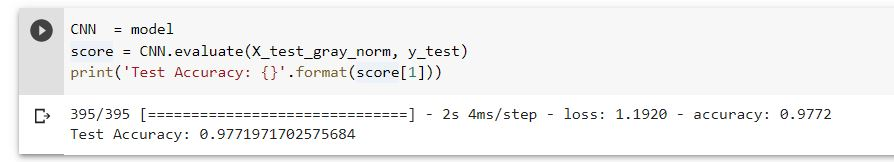

#Other helper functions

In [ ]:
history.history.keys()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [ ]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    